In [13]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('outputFromLSTM')
df.head()

,Unnamed: 0,tweet,location,favorites,followers,timestamp,sentiment,prediction,LSTM_LEARNED_SENTIMENTS
0,0,Financial records reveal Joe Biden had $5.2mil...,Null,1.0,0.0,Sat Apr 30 19:52:31 +0000 2022,4.0,tech,1
1,1,Glory be to Ukraines dedicated military,Null,1.0,102.0,Sat Apr 30 19:52:31 +0000 2022,4.0,entertainment,1
2,2,RT @Osinttechnical: Ukrainian forces continue ...,Null,1.0,42.0,Sat Apr 30 19:52:31 +0000 2022,4.0,business,0
3,3,RT @oryxspioenkop: Answering The Call: Heavy W...,NaN,NaN,NaN,NaN,4.0,business,1
4,4,Updated with:,NaN,NaN,NaN,NaN,4.0,tech,1


In [42]:
df.count()

Unnamed: 0                 330979
tweet                      330979
location                   229303
favorites                  229267
followers                  229243
timestamp                  229243
sentiment                  330979
prediction                 330979
LSTM_LEARNED_SENTIMENTS    330979
dtype: int64

In [43]:
df=df.drop(["location","favorites","followers","timestamp"], axis = 1)

<>:12: DeprecationWarning: invalid escape sequence \w
<>:12: DeprecationWarning: invalid escape sequence \w
/var/folders/87/_c2ttbjn7tl1w8dzqfn6nz7w0000gn/T/ipykernel_7399/3859638930.py:12: DeprecationWarning: invalid escape sequence \w
  regex = "@(\w+)"


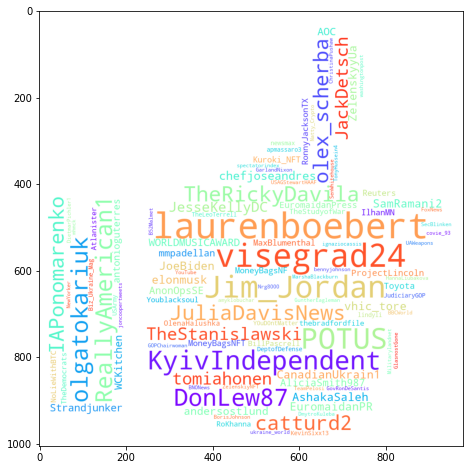

In [34]:
#positive
from PIL import Image # converting images into arrays
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import re
nmostMentionedUser={}
hashtag_list=[]
def extract_usertags(row):
     
    # the regular expression
    regex = "@(\w+)"
     
    # extracting the hashtags
    hashtag_list = re.findall(regex, row['tweet'])
    for hashtag in hashtag_list:
        if hashtag in nmostMentionedUser.keys():
            nmostMentionedUser[hashtag]+=1
        else:
            nmostMentionedUser[hashtag]=1
dfNegetive=df.where(df['LSTM_LEARNED_SENTIMENTS']==1)
dfNegetive=dfNegetive.dropna()
dfNegetive.apply(extract_usertags,axis=1)
# Import image to np.array
mask = np.array(Image.open('upvote.png'))
wordcloud = WordCloud(width = 1000, height = 500,random_state=1, background_color='white', colormap='rainbow', max_words=100, collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(nmostMentionedUser)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

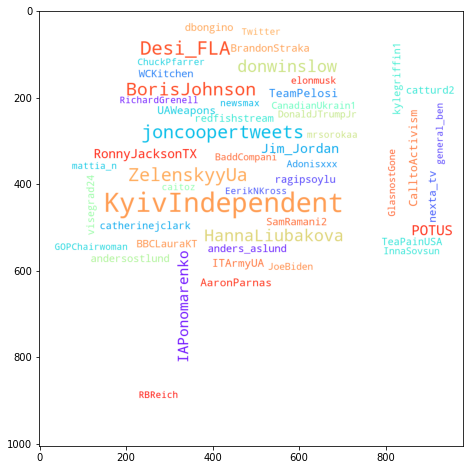

In [6]:
#negitive
import re
nmostMentionedUser={}
hashtag_list=[]
def extract_usertags(row):
     
    # the regular expression
    regex = "@(\w+)"
     
    # extracting the hashtags
    hashtag_list = re.findall(regex, row['tweet'])
    for hashtag in hashtag_list:
        if hashtag in nmostMentionedUser.keys():
            nmostMentionedUser[hashtag]+=1
        else:
            nmostMentionedUser[hashtag]=1
# Import image to np.array
mask = np.array(Image.open('downvote.png'))
dfNegetive=df.where(df['LSTM_LEARNED_SENTIMENTS']==0)
dfNegetive=dfNegetive.dropna()
dfNegetive.apply(extract_usertags,axis=1)

wordcloud = WordCloud(width = 1000, height = 500,random_state=1, background_color='white',colormap='rainbow', max_words=50, collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(nmostMentionedUser)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

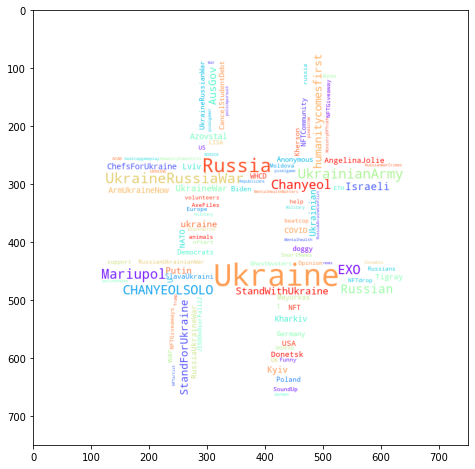

In [7]:
#positive hashtags
from PIL import Image # converting images into arrays
from wordcloud import WordCloud, STOPWORDS
import re
nmostMentionedUser={}
hashtag_list=[]
def extract_usertags(row):
     
    # the regular expression
    regex = "#(\w+)"
     
    # extracting the hashtags
    hashtag_list = re.findall(regex, row['tweet'])
    for hashtag in hashtag_list:
        if hashtag in nmostMentionedUser.keys():
            nmostMentionedUser[hashtag]+=1
        else:
            nmostMentionedUser[hashtag]=1
dfNegetive=df.where(df['LSTM_LEARNED_SENTIMENTS']==1)

dfNegetive=dfNegetive[dfNegetive['tweet'].notna()]

dfNegetive.apply(extract_usertags,axis=1)
# Import image to np.array
mask = np.array(Image.open('hashtag.png'))
wordcloud = WordCloud(width = 1000, height = 500,random_state=1, background_color='white', colormap='rainbow', max_words=100, collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(nmostMentionedUser)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

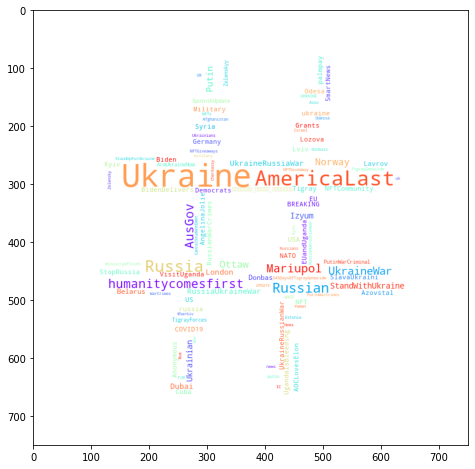

In [8]:
#Negitive hashtags
from PIL import Image # converting images into arrays
from wordcloud import WordCloud, STOPWORDS
import re
nmostMentionedUser={}
hashtag_list=[]
def extract_usertags(row):
     
    # the regular expression
    regex = "#(\w+)"
     
    # extracting the hashtags
    hashtag_list = re.findall(regex, row['tweet'])
    for hashtag in hashtag_list:
        if hashtag in nmostMentionedUser.keys():
            nmostMentionedUser[hashtag]+=1
        else:
            nmostMentionedUser[hashtag]=1
dfNegetive=df.where(df['LSTM_LEARNED_SENTIMENTS']==0)

dfNegetive=dfNegetive[dfNegetive['tweet'].notna()]
dfNegetive.apply(extract_usertags,axis=1)
# Import image to np.array
mask = np.array(Image.open('hashtag.png'))
wordcloud = WordCloud(width = 1000, height = 500,random_state=1, background_color='white', colormap='rainbow', max_words=100, collocations=False, stopwords = STOPWORDS, mask=mask).generate_from_frequencies(nmostMentionedUser)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [ ]:
#name Entity recognasation

In [ ]:
pip install -U spacy

In [9]:
# for manipulating dataframes
import pandas as pd
# for natural language processing: named entity recognition
import spacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
# for visualizations
%matplotlib inline

In [10]:

df=df[df['tweet'].notna()]

In [11]:
df.count()

Unnamed: 0                 330979
tweet                      330979
sentiment                  330979
prediction                 330979
LSTM_LEARNED_SENTIMENTS    330979
dtype: int64

In [12]:
positive_person_list = []
negitive_person_list = []
pos_norp_list = []
neg_norp_list = []

In [13]:
df_pos=df.where(df['LSTM_LEARNED_SENTIMENTS']==1)
df_neg=df.where(df['LSTM_LEARNED_SENTIMENTS']==0)

In [14]:
df_pos.count()

Unnamed: 0                 194593
tweet                      194593
sentiment                  194593
prediction                 194593
LSTM_LEARNED_SENTIMENTS    194593
dtype: int64

In [15]:
df_neg.count()

Unnamed: 0                 136386
tweet                      136386
sentiment                  136386
prediction                 136386
LSTM_LEARNED_SENTIMENTS    136386
dtype: int64

In [49]:
tokens = nlp(''.join(str(df_pos[190000:194593].tweet.tolist())))

for ent in tokens.ents:
    if ent.label_ == 'PERSON':
         positive_person_list.append(ent.text)

for ent in tokens.ents:
    if ent.label_ == 'NORP':
         pos_norp_list.append(ent.text)

In [43]:

tokens = nlp(''.join(str(df_neg[130000:136386].tweet.tolist())))

for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        negitive_person_list.append(ent.text)

for ent in tokens.ents:
    if ent.label_ == 'NORP':
        neg_norp_list.append(ent.text)

In [50]:
print(len(positive_person_list),len(pos_norp_list),len(negitive_person_list),len(neg_norp_list))

38401 22955 17762 18085


In [51]:
        
person_counts = Counter(positive_person_list).most_common(20)
df_person =pd.DataFrame(person_counts, columns =['text', 'count'])

In [52]:
        
norp_counts = Counter(pos_norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [53]:
df_person.head(10)

,text,count
0,Biden,2755
1,Joe Biden,2634
2,Putin,1653
3,Jamie Raskin,1267
4,Joe Biden’s,1111
5,Steve Bannon,870
6,Mark Meadows',868
7,Bill Barr',867
8,Tim Ryan,802
9,RT @TheStanislawski,726


In [58]:
df_norp[1:].head(10)

,text,count
1,Democrats,4653
2,Republicans,1075
3,Republican,1025
4,Ukrainians,888
5,Nazis,743
6,Ukrainian,741
7,democrats,656
8,Democrat,585
9,German,435
10,Russians,433


In [55]:
person_counts = Counter(negitive_person_list).most_common(20)
negitive_df_person =pd.DataFrame(person_counts, columns =['text', 'count'])        
norp_counts = Counter(neg_norp_list).most_common(20)
negitive_df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [56]:
negitive_df_person.head(10)

,text,count
0,Joe Biden,1822
1,Putin,1573
2,Biden,1330
3,Joe Biden’s,754
4,RT @BorisJohnson,540
5,Simonov,502
6,Easter,492
7,Serhiy Tarabalka,471
8,Hunter,461
9,COVID-19,353


In [57]:
negitive_df_norp.head(10)

,text,count
0,Russian,5807
1,Nazi,2587
2,Democrats,2150
3,Ukrainian,729
4,Russians,638
5,American,536
6,Republicans,504
7,Americans,435
8,Ukrainians,428
9,democrats,423


In [108]:
!pip install pyLDAvis

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import time
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
#import pyLDAvis.gensim
from gensim.models import CoherenceModel

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [57]:
def initial_clean(text):
    """
    Function to clean text-remove punctuations, lowercase text etc.
    """
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    text = text.lower()  # lower case text
    text = nltk.word_tokenize(text)
    

    return (text)

<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/87/_c2ttbjn7tl1w8dzqfn6nz7w0000gn/T/ipykernel_7399/2628079585.py:5: DeprecationWarning: invalid escape sequence \w
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)


In [58]:

stop_words = stopwords.words('english')
# adding some more stop words that doesn't convey much meaning in terms of reviews feel free to extend or reduce this list
stop_words.extend(['news', 'say','use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 
                   'good', 'go', 'get', 'do','took','time','year',
                 'done', 'try', 'many', 'some','nice', 'thank', 'think', 'see', 'rather',
                  'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 
                   'even', 'right', 'line','even', 'also', 'may', 'take', 'come',
                   'new','said', 'like','people','rt','RT'])

In [59]:
def remove_stop_words(text):
     return [word for word in text if word not in stop_words]

In [60]:
stemmer = PorterStemmer()
def stem_words(text):
    """
    Function to stem words
    """
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # no single letter words
    except IndexError:
        pass

    return text

In [61]:
def apply_all(text):
    """
    This function applies all the functions above into one
    """
    return stem_words(remove_stop_words(initial_clean(text)))

In [62]:

t1 = time.time()


df['tokenized_tweet'] = df['tweet'].apply(apply_all)

t2 = time.time()


In [63]:
df.head()

,Unnamed: 0,tweet,sentiment,prediction,LSTM_LEARNED_SENTIMENTS,tokenized_tweet
0,0,Financial records reveal Joe Biden had $5.2mil...,4.0,tech,1,"[financi, record, reveal, joe, biden, 2million..."
1,1,Glory be to Ukraines dedicated military,4.0,entertainment,1,"[glori, ukrain, dedic, militari]"
2,2,RT @Osinttechnical: Ukrainian forces continue ...,4.0,business,0,"[ukrainian, forc, continu, push, kharkiv]"
3,3,RT @oryxspioenkop: Answering The Call: Heavy W...,4.0,business,1,"[answer, call, heavi, weaponri, suppli, ukrain]"
4,4,Updated with:,4.0,tech,1,[updat]


In [64]:
#LDA
#Create a Gensim dictionary from the tokenized data
tokenized = df['tokenized_tweet']
#Creating term dictionary of corpus, where each unique term is assigned an index.
dictionary = corpora.Dictionary(tokenized)
#Filter terms which occurs in less than 1 review and more than 80% of the reviews.
dictionary.filter_extremes(no_below=1, no_above=0.8)
#convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized]
print(corpus[:1])

print([[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]
[[('2million', 1), ('biden', 1), ('daili', 1), ('financi', 1), ('incom', 1), ('joe', 1), ('mail', 1), ('onlin', 1), ('record', 1), ('reveal', 1), ('unexplain', 1)]]


In [71]:
#LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 6, id2word=dictionary, passes=12, alpha="auto", eta=0.99)
#saving the model
ldamodel.save('model_combined.gensim')
topics = ldamodel.print_topics(num_words=6)
print('\n')
print("Now printing the topics and their composition")
print("This output shows the Topic-Words matrix for the 6 topics created and the  words within each topic")
for topic in topics:
   print(topic)



Now printing the topics and their composition
This output shows the Topic-Words matrix for the 6 topics created and the  words within each topic
(0, '0.047*"hous" + 0.043*"white" + 0.021*"biden" + 0.020*"correspond"')
(1, '0.035*"biden" + 0.022*"democrat" + 0.014*"joe" + 0.011*"amp"')
(2, '0.072*"ukrain" + 0.030*"russia" + 0.025*"russian" + 0.022*"war"')
(3, '0.026*"ukrain" + 0.021*"plan" + 0.016*"follow" + 0.012*"joli"')
(4, '0.068*"ukrain" + 0.031*"billion" + 0.027*"russian" + 0.024*"dollar"')


In [72]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.29846890539450666


In [73]:
print('\n')
print("first review is:")
print(df.tweet[1])
get_document_topics = ldamodel.get_document_topics(corpus[1])
print('\n')
print("The similarity of this review with the topics and respective similarity score are ")
print(get_document_topics)



first review is:
Glory be to Ukraines dedicated military


The similarity of this review with the topics and respective similarity score are 
[(0, 0.014577221), (1, 0.040652562), (2, 0.41842023), (3, 0.013534402), (4, 0.5128156)]


In [74]:
#visualizing topics
lda_viz = gensim.models.ldamodel.LdaModel.load('model_combined.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda_viz, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentat

In [75]:
df.head()

,Unnamed: 0,tweet,sentiment,prediction,LSTM_LEARNED_SENTIMENTS,tokenized_tweet
0,0,Financial records reveal Joe Biden had $5.2mil...,4.0,tech,1,"[financi, record, reveal, joe, biden, 2million..."
1,1,Glory be to Ukraines dedicated military,4.0,entertainment,1,"[glori, ukrain, dedic, militari]"
2,2,RT @Osinttechnical: Ukrainian forces continue ...,4.0,business,0,"[ukrainian, forc, continu, push, kharkiv]"
3,3,RT @oryxspioenkop: Answering The Call: Heavy W...,4.0,business,1,"[answer, call, heavi, weaponri, suppli, ukrain]"
4,4,Updated with:,4.0,tech,1,[updat]


In [76]:
df.count()

Unnamed: 0                 330979
tweet                      330979
sentiment                  330979
prediction                 330979
LSTM_LEARNED_SENTIMENTS    330979
tokenized_tweet            330979
dtype: int64

In [78]:
df_pos=df[df["LSTM_LEARNED_SENTIMENTS"]==1]
df_neg=df[df["LSTM_LEARNED_SENTIMENTS"]==0]

In [80]:
df_pos.count()

Unnamed: 0                 194593
tweet                      194593
sentiment                  194593
prediction                 194593
LSTM_LEARNED_SENTIMENTS    194593
tokenized_tweet            194593
dtype: int64

In [81]:

df_neg.count()

Unnamed: 0                 136386
tweet                      136386
sentiment                  136386
prediction                 136386
LSTM_LEARNED_SENTIMENTS    136386
tokenized_tweet            136386
dtype: int64

In [82]:
pip install voila

     |████████████████████████████████| 1.7 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 6.2 MB/s  eta 0:00:01
     |████████████████████████████████| 561 kB 41.7 MB/s eta 0:00:01


  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.1.0
    Uninstalling nbconvert-6.1.0:
      Successfully uninstalled nbconvert-6.1.0
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [83]:
#LDA
#Create a Gensim dictionary from the tokenized data
tokenized = df_pos['tokenized_tweet']
#Creating term dictionary of corpus, where each unique term is assigned an index.
dictionary = corpora.Dictionary(tokenized)
#Filter terms which occurs in less than 1 review and more than 80% of the reviews.
dictionary.filter_extremes(no_below=1, no_above=0.8)
#convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized]
print(corpus[:1])

print([[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]
[[('2million', 1), ('biden', 1), ('daili', 1), ('financi', 1), ('incom', 1), ('joe', 1), ('mail', 1), ('onlin', 1), ('record', 1), ('reveal', 1), ('unexplain', 1)]]


In [84]:
#LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=12, alpha="auto", eta=0.99)
#saving the model
ldamodel.save('model_combined.gensim')
topics = ldamodel.print_topics(num_words=6)
print('\n')
print("Now printing the topics and their composition")
print("This output shows the Topic-Words matrix for the 6 topics created and the  words within each topic")
for topic in topics:
   print(topic)



Now printing the topics and their composition
This output shows the Topic-Words matrix for the 6 topics created and the  words within each topic
(0, '0.028*"biden" + 0.022*"ukrain" + 0.014*"democrat" + 0.014*"amp" + 0.009*"putin" + 0.009*"presid"')
(1, '0.041*"ukrain" + 0.021*"forc" + 0.017*"ukrainian" + 0.016*"democrat" + 0.015*"joli" + 0.014*"angelina"')
(2, '0.054*"white" + 0.049*"hous" + 0.026*"correspond" + 0.026*"dinner" + 0.014*"ukrain" + 0.011*"respect"')
(3, '0.028*"biden" + 0.028*"truth" + 0.023*"ministri" + 0.023*"joe" + 0.020*"disinform" + 0.017*"dh"')
(4, '0.055*"ukrain" + 0.042*"russian" + 0.022*"militari" + 0.013*"drive" + 0.012*"anti" + 0.010*"wheel"')


In [85]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.29859271525794306


In [86]:
print('\n')
print("first review is:")
print(df.tweet[1])
get_document_topics = ldamodel.get_document_topics(corpus[1])
print('\n')
print("The similarity of this review with the topics and respective similarity score are ")
print(get_document_topics)



first review is:
Glory be to Ukraines dedicated military


The similarity of this review with the topics and respective similarity score are 
[(0, 0.038811866), (1, 0.01223875), (2, 0.011960444), (3, 0.013018239), (4, 0.9239707)]


In [87]:
#visualizing topics
lda_viz = gensim.models.ldamodel.LdaModel.load('model_combined.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda_viz, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentat

In [88]:
#LDA
#Create a Gensim dictionary from the tokenized data
tokenized = df_neg['tokenized_tweet']
#Creating term dictionary of corpus, where each unique term is assigned an index.
dictionary = corpora.Dictionary(tokenized)
#Filter terms which occurs in less than 1 review and more than 80% of the reviews.
dictionary.filter_extremes(no_below=1, no_above=0.8)
#convert the dictionary to a bag of words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized]
print(corpus[:1])

print([[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]]
[[('continu', 1), ('forc', 1), ('kharkiv', 1), ('push', 1), ('ukrainian', 1)]]


In [89]:
#LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=12, alpha="auto", eta=0.99)
#saving the model
ldamodel.save('model_combined.gensim')
topics = ldamodel.print_topics(num_words=6)
print('\n')
print("Now printing the topics and their composition")
print("This output shows the Topic-Words matrix for the 6 topics created and the  words within each topic")
for topic in topics:
   print(topic)



Now printing the topics and their composition
This output shows the Topic-Words matrix for the 6 topics created and the  words within each topic
(0, '0.017*"ukrain" + 0.012*"militari" + 0.011*"citizen" + 0.011*"yet" + 0.011*"school" + 0.010*"money"')
(1, '0.097*"biden" + 0.054*"joe" + 0.031*"presid" + 0.016*"break" + 0.016*"russia" + 0.012*"ukrain"')
(2, '0.033*"ukrain" + 0.019*"democrat" + 0.014*"russia" + 0.013*"war" + 0.008*"us" + 0.008*"putin"')
(3, '0.061*"ukrain" + 0.036*"billion" + 0.029*"dollar" + 0.027*"hous" + 0.025*"white" + 0.021*"dh"')
(4, '0.049*"ukrain" + 0.041*"russian" + 0.022*"militari" + 0.021*"kill" + 0.018*"nazi" + 0.018*"forc"')


In [90]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2233928508264588


In [91]:
print('\n')
print("first review is:")
print(df.tweet[1])
get_document_topics = ldamodel.get_document_topics(corpus[1])
print('\n')
print("The similarity of this review with the topics and respective similarity score are ")
print(get_document_topics)



first review is:
Glory be to Ukraines dedicated military


The similarity of this review with the topics and respective similarity score are 
[(0, 0.8547611), (1, 0.024021113), (2, 0.06985512), (3, 0.02461597), (4, 0.026746677)]


In [92]:
#visualizing topics
lda_viz = gensim.models.ldamodel.LdaModel.load('model_combined.gensim')
lda_display = pyLDAvis.gensim_models.prepare(lda_viz, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentat